In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()

CustomerID    0
Genre         0
Age           0
Income        0
Score         0
dtype: int64

<Axes: xlabel='Income', ylabel='Score'>

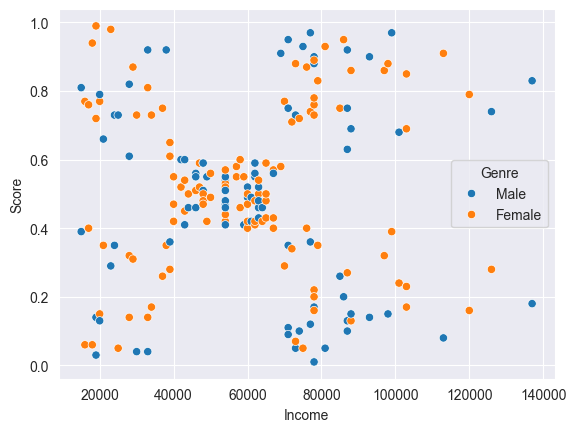

In [5]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [6]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)
X.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,19,15000,0.39,False,True
1,21,15000,0.81,False,True
2,20,16000,0.06,True,False
3,23,16000,0.77,True,False
4,31,17000,0.40,True,False


In [7]:
from sklearn.cluster import KMeans

In [8]:
k_means = KMeans(n_clusters=3, random_state=42).fit(X)

In [9]:
wcss = k_means.inertia_
print(f'WCSS c 3я кластерами: {wcss}')

WCSS c 3я кластерами: 25640495835.578606


In [10]:
y_kmeans = k_means.labels_

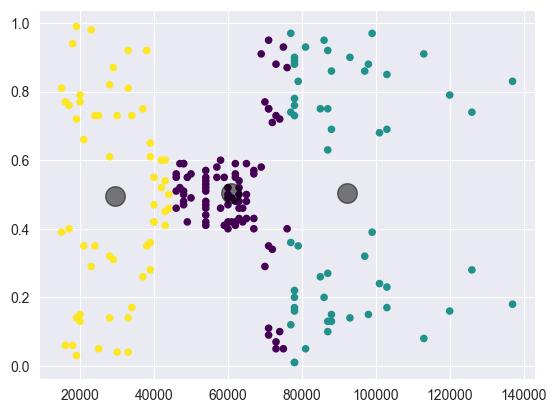

In [11]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

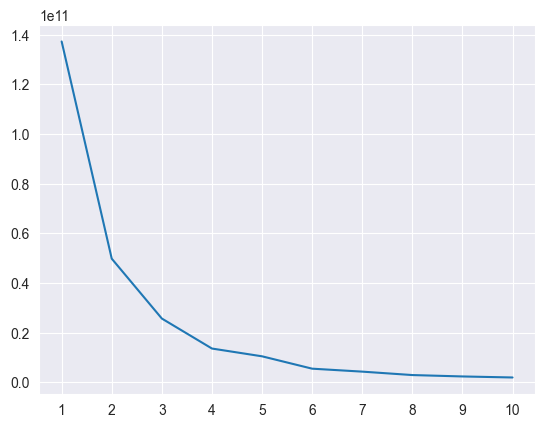

In [12]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

In [13]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)

In [14]:
y_kmeans = k_means.labels_

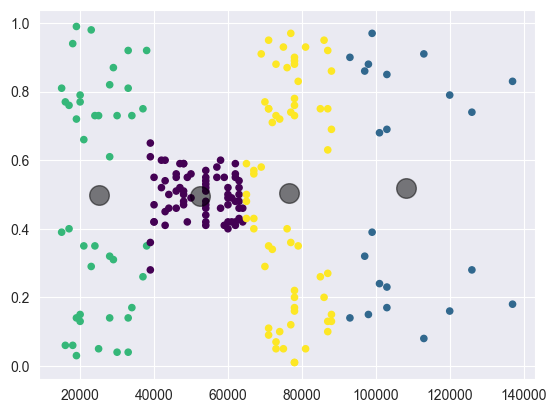

In [15]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [16]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)

In [17]:
y_kmeans = k_means.labels_

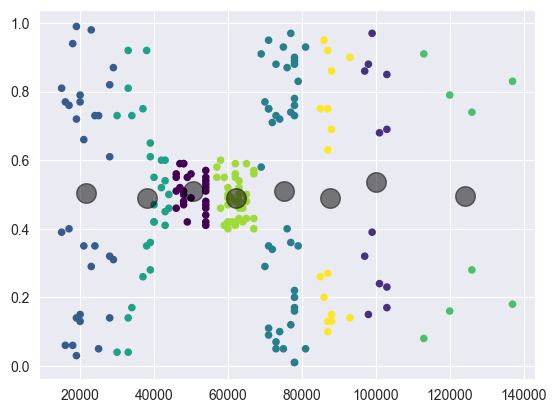

In [18]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


<Axes: xlabel='Income', ylabel='Score'>

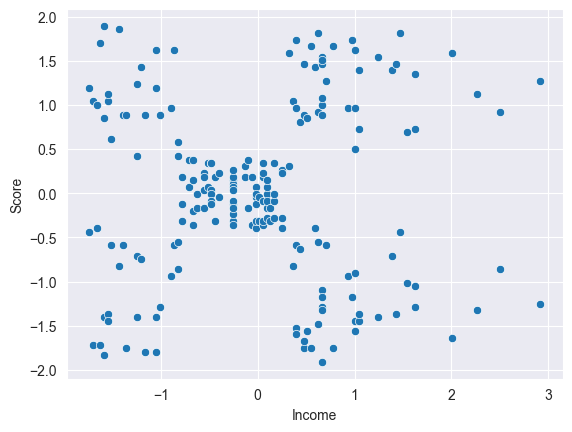

In [21]:
sns.scatterplot(x='Income' , y='Score', data=X_scaled)

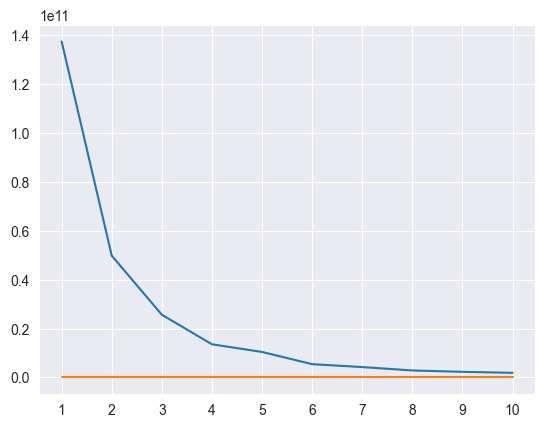

In [22]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

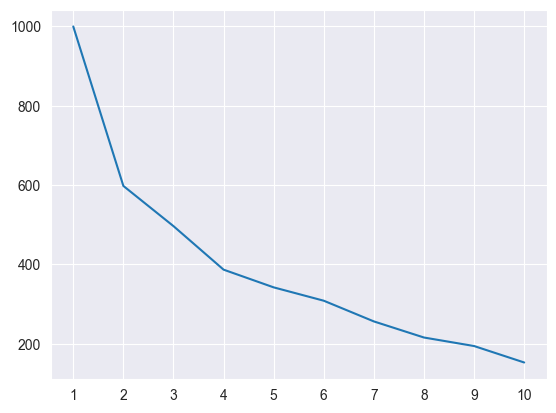

In [23]:
scaled = []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

In [24]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

In [25]:
y_kmeans = k_means.labels_

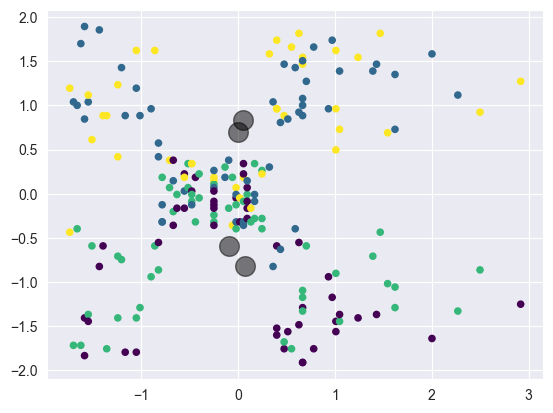

In [26]:
plt.scatter(X_scaled.Income, X_scaled.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [27]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


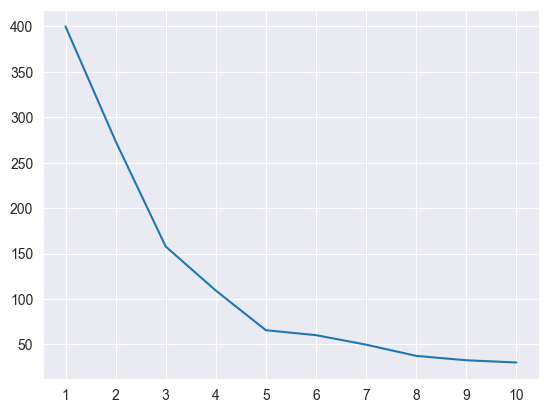

In [28]:
flat = []
for i in range(1,11):
	flat.append(KMeans(n_clusters=i,random_state=42).fit(X_flat).inertia_)
plt.plot(range(1,11),flat)
plt.xticks(range(1,11))
_ = plt.show()

In [29]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)

In [30]:
y_kmeans = k_means.labels_

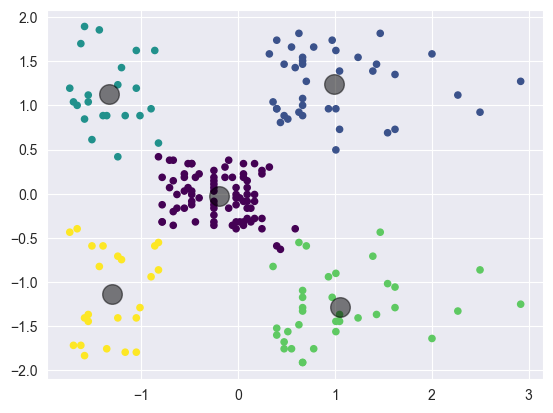

In [31]:
plt.scatter(X_flat.Income, X_flat.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [32]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [33]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [34]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

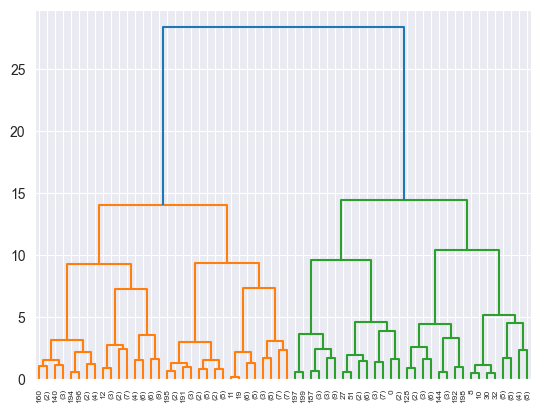

In [35]:
plot_dendrogram(model, truncate_mode="level", p=5)

In [36]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

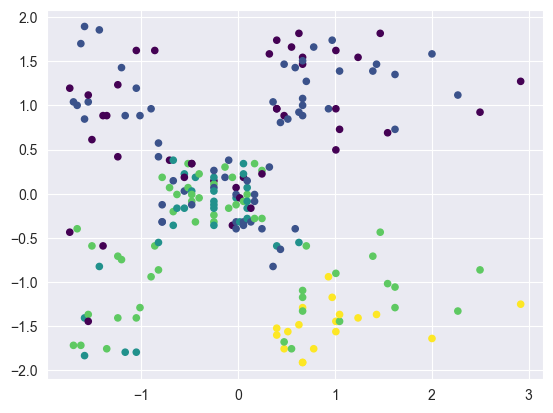

In [37]:
plt.scatter(X_scaled.Income, X_scaled.Score, c=y_agg, s=20, cmap='viridis')

In [38]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_flat)
y_agg = agg_clustering.labels_

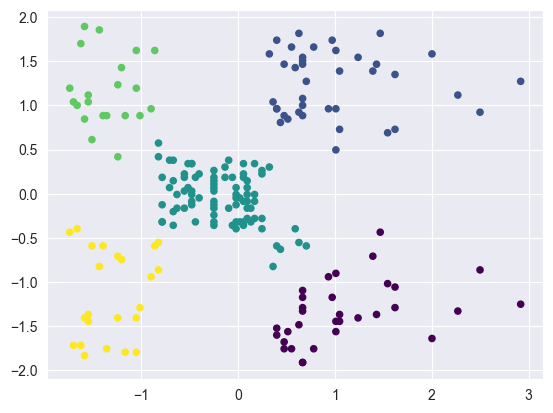

In [39]:

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [42]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

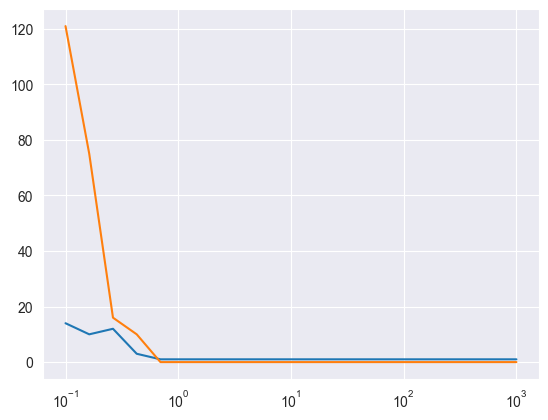

In [43]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

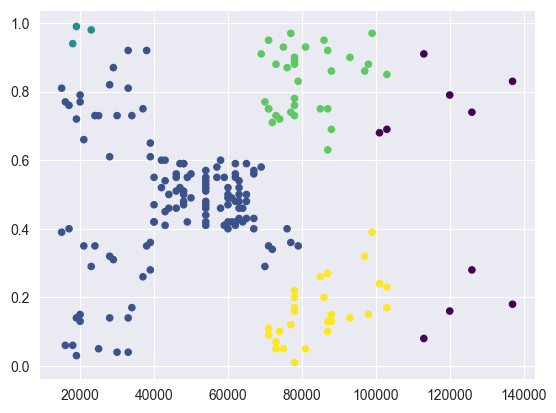

In [44]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')